In [99]:
# pip install ydata_profiling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# from ydata_profiling import ProfileReport

sns.set()

# Read Data

In [3]:
data_raw = pd.read_csv("data.csv")

In [5]:
data_raw.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
data_raw.shape

(253680, 22)

In [9]:
data_raw.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [11]:
data_raw.duplicated().sum()

23899

In [13]:
data = data_raw.copy()

In [15]:
data = data.rename(columns={'Diabetes_012': 'Diabetes'})

In [17]:
data.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [19]:
data.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [29]:
data.iloc[:,9:14].describe()

,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.634256,0.811420,0.056197,0.951053,0.084177
std,0.481639,0.391175,0.230302,0.215759,0.277654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Descriptive Analysis

In [39]:
numercial_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
categorical_features = list(data.drop(numercial_features, axis=1).columns)

## Categorical Features

Diabetes
0    213703
1      4631
2     35346
Name: count, dtype: int64



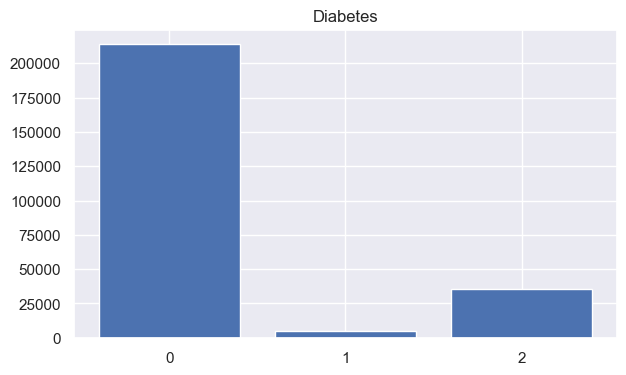


HighBP
0    144851
1    108829
Name: count, dtype: int64



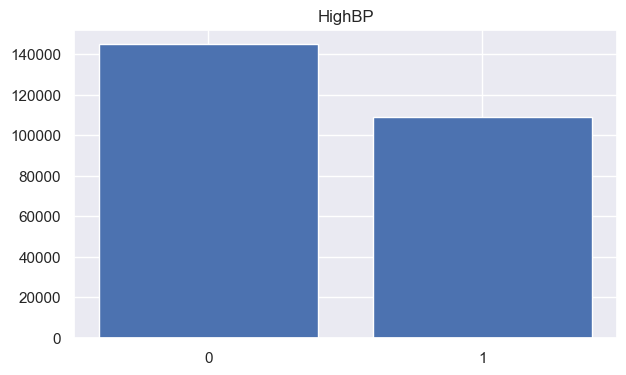


HighChol
0    146089
1    107591
Name: count, dtype: int64



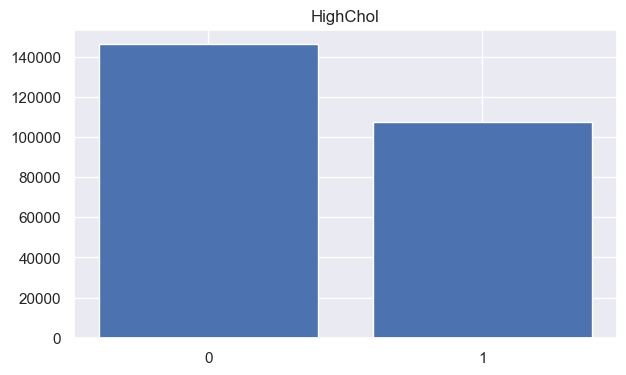


CholCheck
0      9470
1    244210
Name: count, dtype: int64



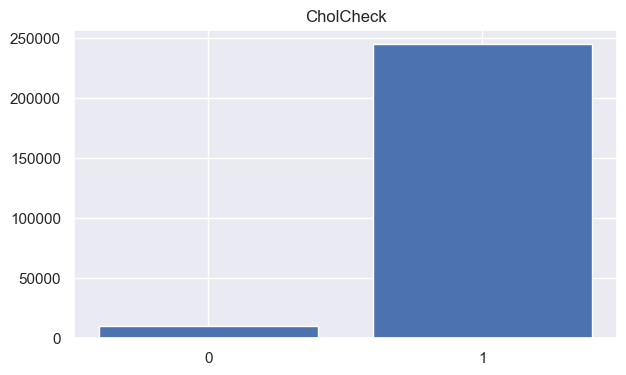


Smoker
0    141257
1    112423
Name: count, dtype: int64



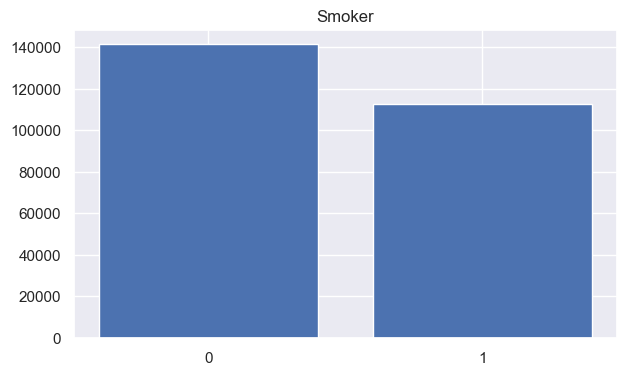


Stroke
0    243388
1     10292
Name: count, dtype: int64



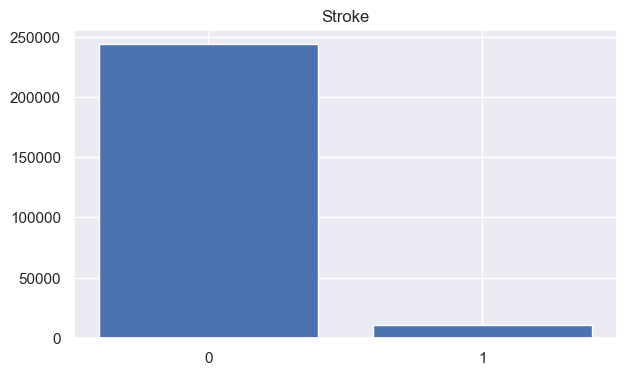


HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64



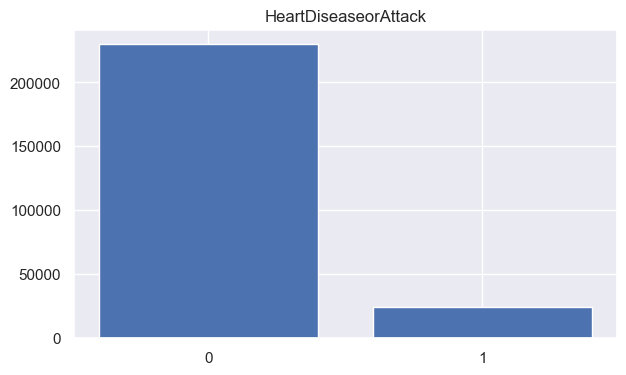


PhysActivity
0     61760
1    191920
Name: count, dtype: int64



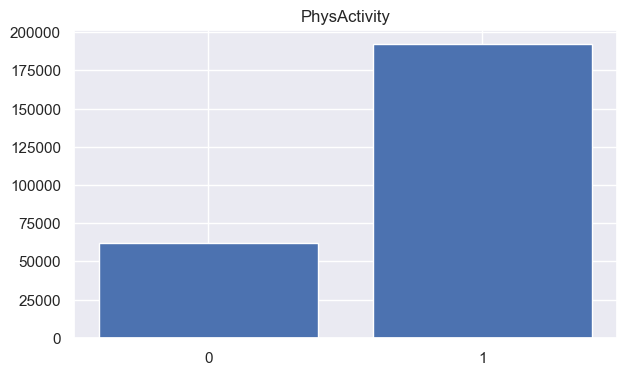


Fruits
0     92782
1    160898
Name: count, dtype: int64



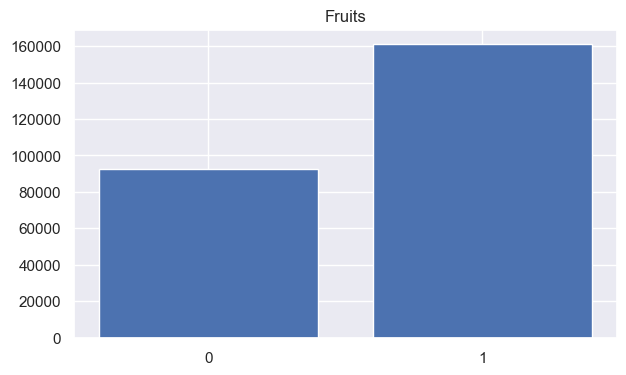


Veggies
0     47839
1    205841
Name: count, dtype: int64



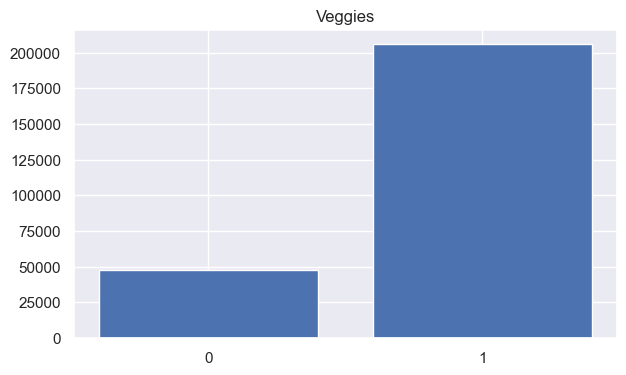


HvyAlcoholConsump
0    239424
1     14256
Name: count, dtype: int64



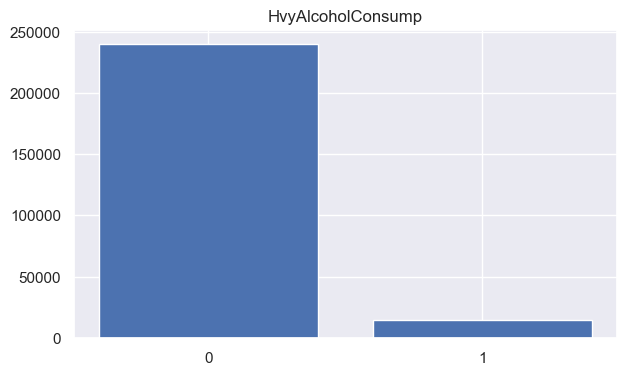


AnyHealthcare
0     12417
1    241263
Name: count, dtype: int64



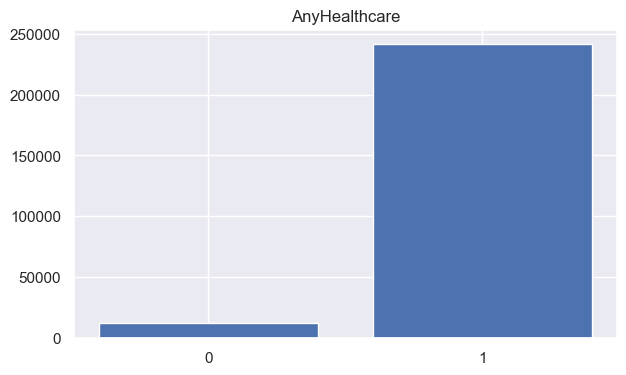


NoDocbcCost
0    232326
1     21354
Name: count, dtype: int64



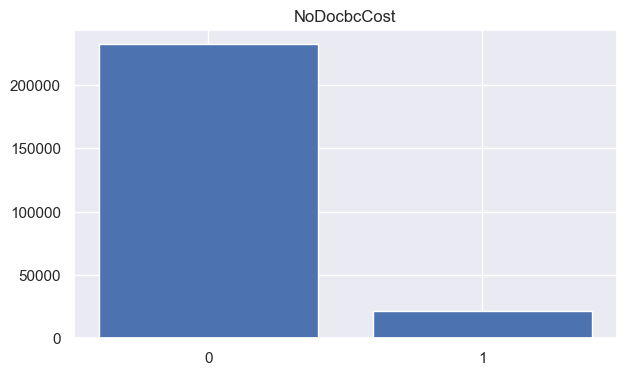


DiffWalk
0    211005
1     42675
Name: count, dtype: int64



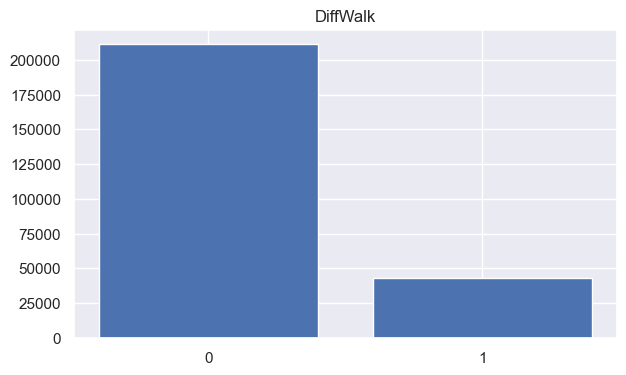


Sex
0    141974
1    111706
Name: count, dtype: int64



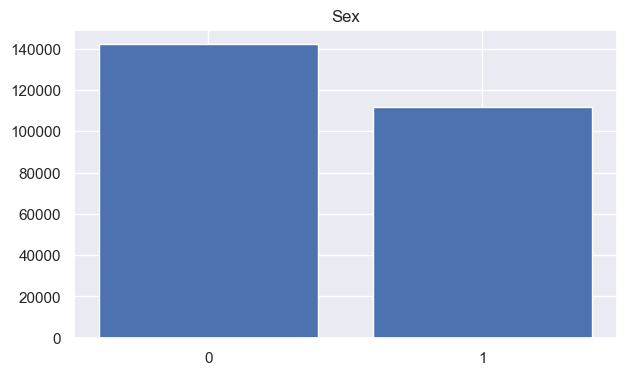

In [66]:
for c in categorical_features:
    
    print(data[c].astype(int).value_counts().sort_index())
    print("")
    
    plt.figure(figsize=(7, 4))
    y = data[c].value_counts().sort_index()
    x = y.index.astype(int).astype(str)
    plt.bar(x, y)
    plt.title(c)
    plt.show()
    
    print("")

## Numerical Features

BMI
count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64



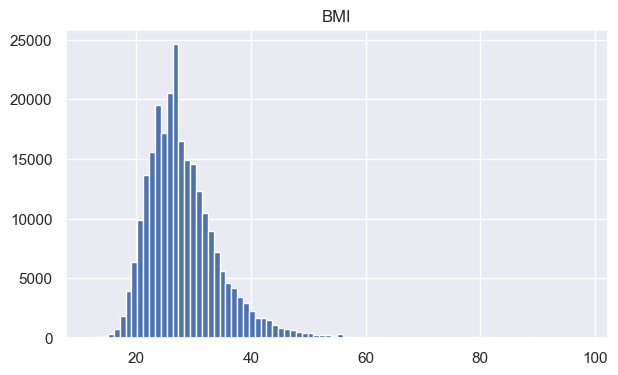


GenHlth
count    253680.000000
mean          2.511392
std           1.068477
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64



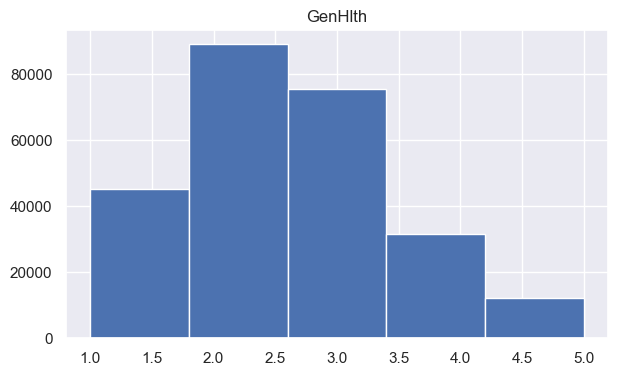


MentHlth
count    253680.000000
mean          3.184772
std           7.412847
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64



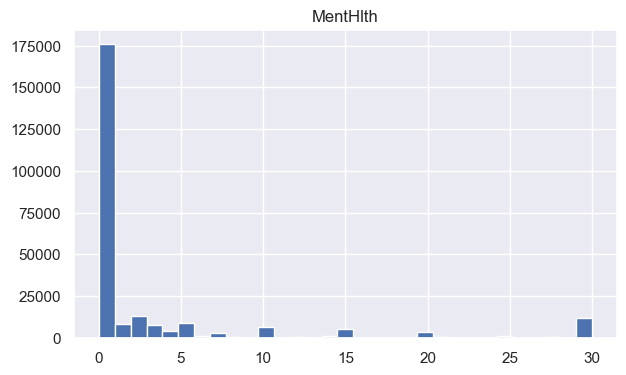


PhysHlth
count    253680.000000
mean          4.242081
std           8.717951
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysHlth, dtype: float64



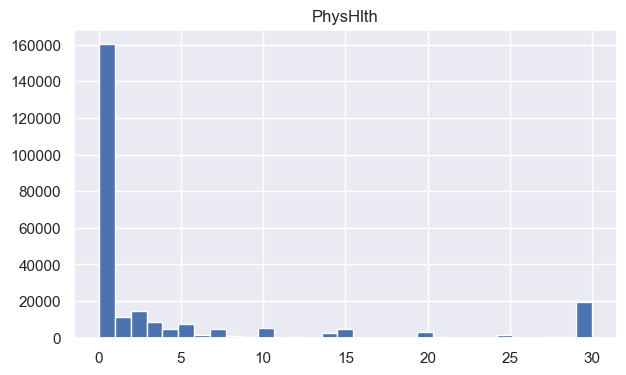


Age
count    253680.000000
mean          8.032119
std           3.054220
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64



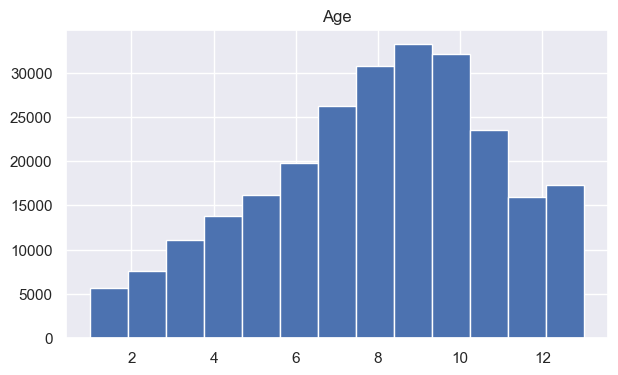


Education
count    253680.000000
mean          5.050434
std           0.985774
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64



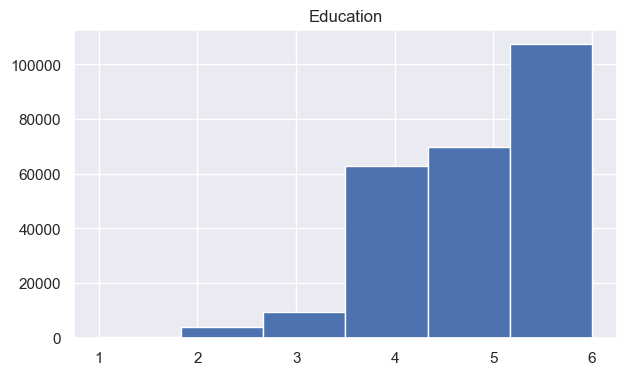


Income
count    253680.000000
mean          6.053875
std           2.071148
min           1.000000
25%           5.000000
50%           7.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64



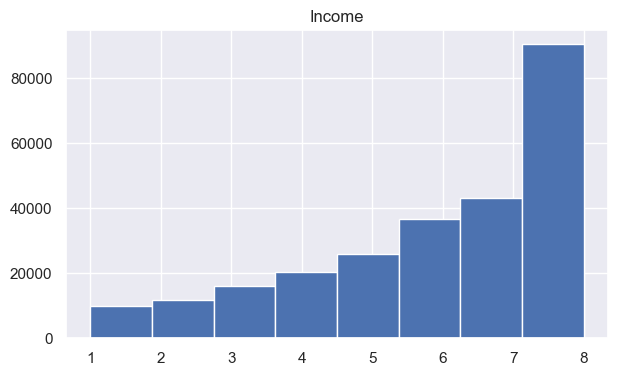

In [92]:
for c in numercial_features:
    
    print(f"{c}")
    print(data[c].describe())
    print("")
    
    plt.figure(figsize=(7, 4))
    x = data[c]
    plt.hist(x, bins=len(x.unique().astype(int)))
    plt.title(c)
    plt.show()
    
    print("")

In [94]:
# profile = ProfileReport(data, title='Diabetes Factors')

In [96]:
# profile.to_file("diabetes_factors.html")